# Starting team selection

This first document looks at how to decide on an ***initial team*** to begin the season with. There are numerous factors which must be considered. 

If we can maximise ROI we maximize total points throughout the season. 

***Man United Man City Burnley Villa do not play first week***

Therefore, the primary objective is **maximise ROI across 15 players who play week in week out and rotate players based on fixtures**

This is constrained by finding the best starting 11 that do not include players from any of these 4 teams. 

For the first gameweek, I'm just going to ignore all new players and stick with well estalished players to begin with. 

In [1145]:
#package import

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [1146]:
#data import 

#basic data
data = pd.read_csv("https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2020-21/cleaned_players.csv")
data["ROI"] = data["total_points"]/data["now_cost"]
data["full_name"] = data["first_name"] + " " + data["second_name"]


#raw_data
raw_data = pd.read_csv("https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2020-21/players_raw.csv")
# 1= gk ... 4 = FWD (element type)


#player ID
player_id = pd.read_csv("https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2020-21/player_idlist.csv")

#raw_data[["id", "now_cost"]].head(10)
player_id["full_name"] = player_id["full_name"] = player_id["first_name"] + " " + player_id["second_name"]


data["id"] = player_id["id"]
data["position"] = raw_data["element_type"]
#data.set_index("full_name", inplace = False, drop = False)

star_team = [] #list of star team (by index) # creating list of star players to be appended

data.head()

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,...,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,ROI,full_name,id,position
0,Mesut,Özil,1,3,53,1439,20,582.9,223.6,190.0,...,5,0,1,1.7,70,MID,0.757143,Mesut Özil,1,3
1,Sokratis,Papastathopoulos,2,0,57,1696,25,36.8,436.2,110.0,...,4,0,6,0.4,50,DEF,1.140000,Sokratis Papastathopoulos,2,2
2,David,Luiz Moreira Marinho,2,1,94,2809,42,106.7,701.6,211.0,...,8,2,5,2.5,55,DEF,1.709091,David Luiz Moreira Marinho,3,2
3,Pierre-Emerick,Aubameyang,22,5,205,3136,44,479.6,1006.0,1369.0,...,10,1,3,45.4,120,MID,1.708333,Pierre-Emerick Aubameyang,4,3
4,Cédric,Soares,1,1,61,1553,20,218.9,349.0,118.0,...,4,0,1,0.6,50,DEF,1.220000,Cédric Soares,5,2


First five rows of the dataset

### Existing teams and players

This is an interactive function which can find the best players in positions for certain prices. Price is on the Y axis, so the further they are up the graph the more expensive they are. ROI is on the x axis so the further right they are on the graph the better they are in terms of ROI. The size of the circle represents how many total points they have. 

'the graph below shows the ROI v price of midfielders with a minimum minutes of 2000'

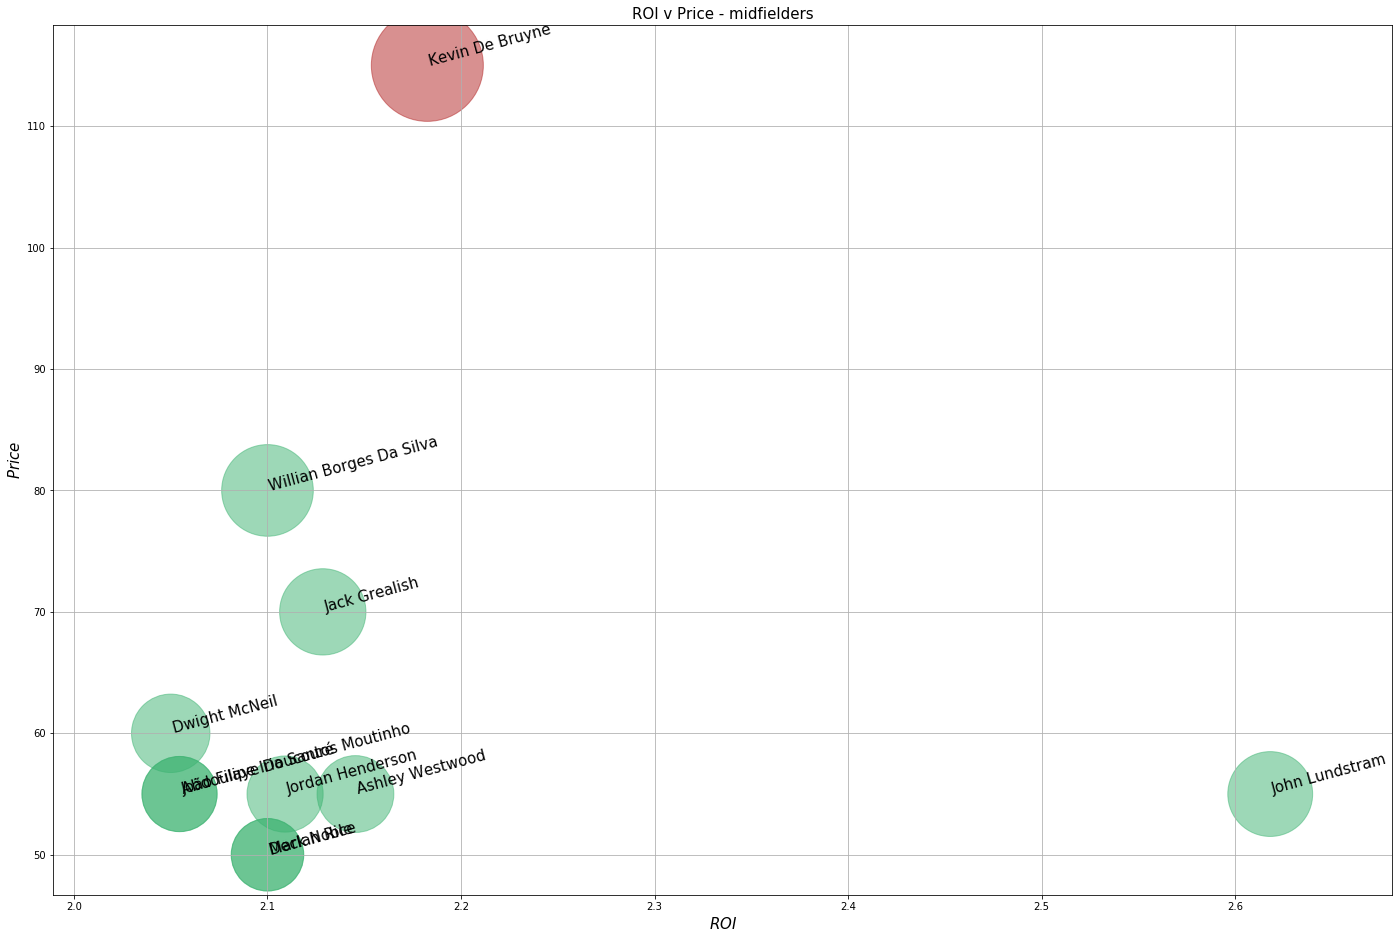

In [1147]:
#Calcualting and plotting ROI against price

#This tool can be used as a quick visual tool to explore players by input


def graph_roi(data, position, min_minutes, minROI, ideal_cost, max_cost):
    data = data[data.minutes > min_minutes].reset_index(drop = True)
    data = data[data.position == position].reset_index(drop = True)
    data = data[data.ROI > minROI].reset_index(drop = True)
    data = data[data.now_cost <= max_cost].reset_index(drop = True)

    positions = ["inplace", "goalkeeper", "defender", "midfielder", "foreword"]
    player_names = data["full_name"]
    x = data["ROI"]
    y = data["now_cost"]
    fig, ax = plt.subplots(figsize = (24,16))

    for i, txt in enumerate(player_names):
        ax.annotate(txt, (x[i], y[i]), rotation = 15, size = 15)
    
    
    ax.grid(which = "major")
    ax.scatter(data["ROI"], data["now_cost"], s = data["total_points"]*50, alpha = 0.5, 
               color = np.where(data.now_cost > ideal_cost, "firebrick", "mediumseagreen" ))
    ax.set_xlabel("$ROI$", size = 15)
    ax.set_ylabel("$Price$", size = 15)
    ax.set_title("ROI v Price - {}s".format(positions[position]), size = 15)
    
    return "the graph below shows the ROI v price of {}s with a minimum minutes of {}".format(
        positions[position], min_minutes)

# GK = 1, DEF = 2, MID = 3, FWD = 4
#position, min_minutes, min_roi, ideal_roi, min_cost

#By inputting players position, minimum minutes, minimum ROI, Ideal cost, and maximum cost
graph_roi(data, 3, 2000, 2, 80, 130)


###### Goalkeepers

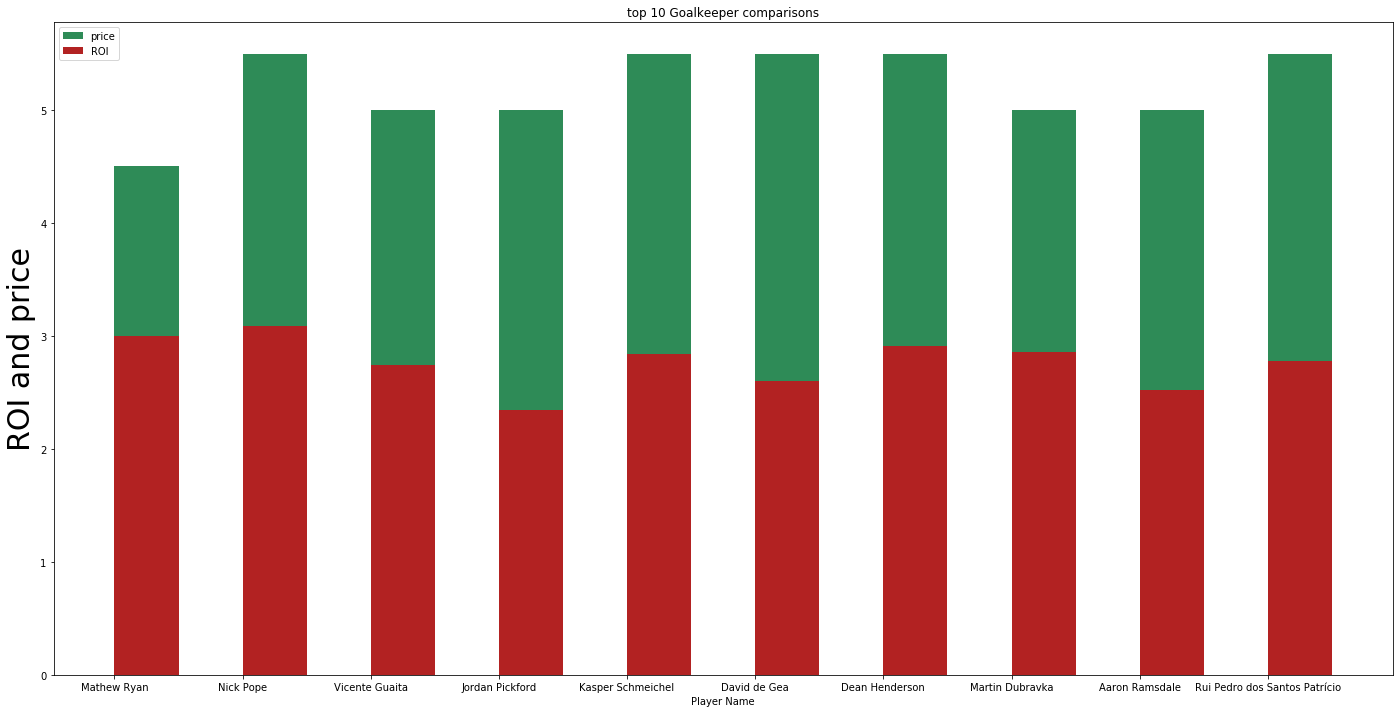

In [1148]:
GK = data[data.position == 1]
GK = GK.loc[:, ["full_name", "ROI", "now_cost", "minutes"]]
top10GK = list(GK.ROI.nlargest(10).index)
GK = GK[GK.index.isin(top10GK)]


#plt.plot(x = GK["full_name"], y = GK["ROI"])
fig, ax = plt.subplots(figsize = (24,12))

ax.bar(GK["full_name"], GK["now_cost"]/10, 0.5, align = "edge", color = "seagreen")


ax.bar(GK["full_name"], GK["ROI"], 0.5, align = "edge", color = "firebrick")
#ax.bar(GK["full_name"], GK["now_cost"]/10, 0.5, align = "edge", color = "seagreen")

ax.set_xlabel("Player Name")
ax.set_ylabel("ROI and price", size = 30)
ax.set_title("top 10 Goalkeeper comparisons")
ax.legend(["price", "ROI"])

#From looking at this, it suggests that nick pope is still the most favourable choice. 
#A nice insight is looking at Matt Ryan, he is significantly cheaper than the rest at 4.5m and has the second highest
#ROI (this is obviously effected by his low price). However, he is a perfect choice for backup - low price, always plays, high ROI. 

From looking at this, it suggests that nick pope is still the most favourable choice. A nice insight is looking at Matt Ryan, he is significantly cheaper than the rest at 4.5m and has the second highest ROI (this is obviously effected by his low price). However, he is a perfect choice for backup - low price, always plays, high ROI. Therfore, ***Nick Pope stays first choice with Matt Ryan as back up.***

##### Defenders

Defenders will be significantly more difficult than goalkeepers. We have to chose 5 defenders. As mentioned before we have a criteria of they must play week in week out and have the highest ROI in that category. It wasnt neccessary with goalkeepers as they tend to play most of the season and rarely get injured (of course leno did but arsenals defence is shocking so he isnt getting anywhere near the team anyway). With defenders however, sometimes they can be injured and players can be brought in in January also. So we can look at ROM (return on minutes) to compliment ROI here. 

Text(0.5, 0, 'ROI')

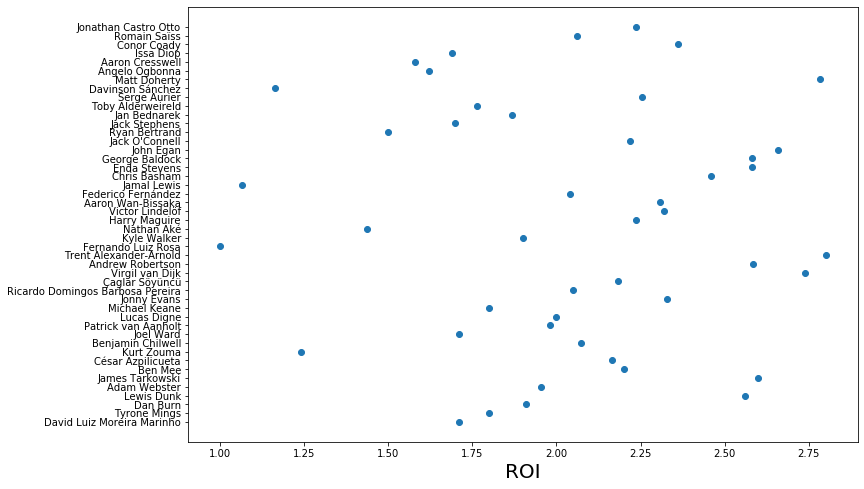

In [1149]:
#First of all we can look at players who have averaged above 60 minutes a game all season and look at their highest ROI's.
# 60 * 38 = 2280 (rounding up to 2300 for convenience)
DEF = data[data.position == 2]
DEF = DEF[DEF.minutes >= 2300] # this leaves 45 players, more than enough to chose from. 

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(DEF.ROI, DEF.full_name)
ax.set_xlabel("ROI", size = 20)

From this we can see that even with an ROI of 2.25 there are still plenty of players to chose from. Therefore, we can filter for this and plot again.

Text(0, 0.5, 'ROI(red) & Price(blue)')

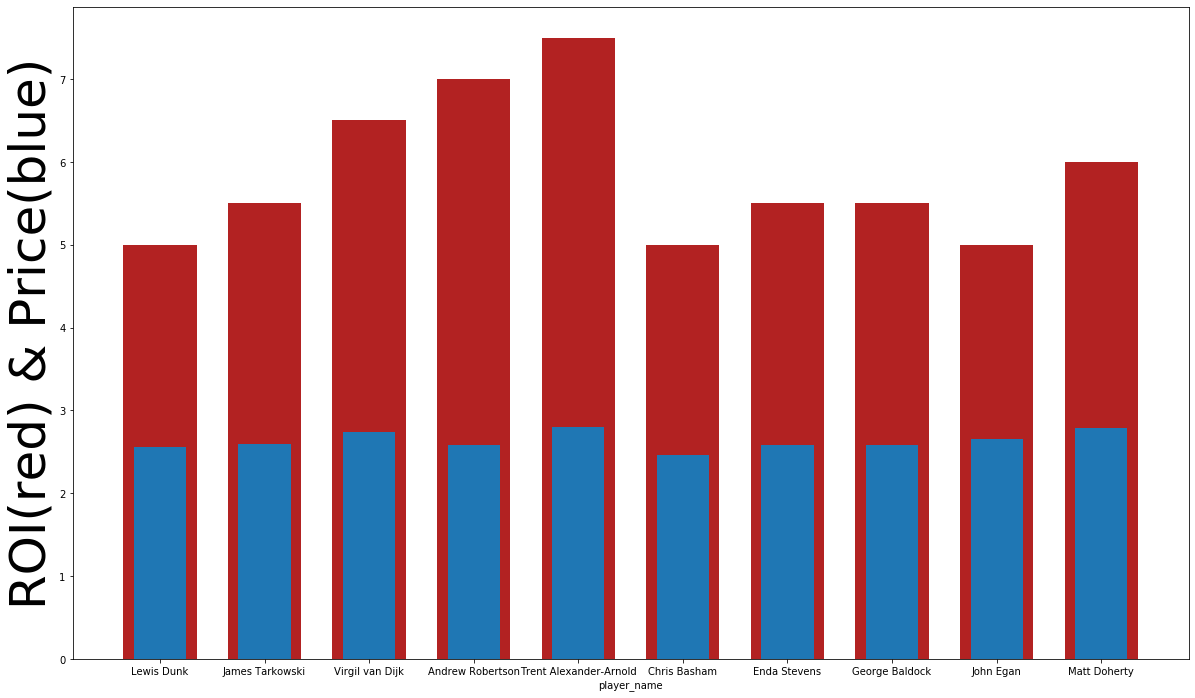

In [1150]:
DEF = DEF[DEF.ROI > 2.4]

fig, ax = plt.subplots(figsize = (20,12))
ax.bar(DEF.full_name, DEF.now_cost/10, width = 0.7, color = "firebrick")
ax.bar(DEF.full_name, DEF.ROI, width = 0.5)
ax.set_xlabel("player_name")
ax.set_ylabel("ROI(red) & Price(blue)", size = 50)

As can be seen there is a correlation between highest ROI and price, suggesting that the top players are still undervalued. It therefore follows, that we need to strike a balance between the highest ROI players as well as the cheapest players with the highest ROI. 

A potential solution is having trent along with dunk, basham, egan and tarkowski. This is quite a diverse range of teams, only basham and egan are from the same team. This would be a total cost of 28m. Plus the 10m for the goalkeepers. This would leave 62 million for the remaining 8 players (averaging 7.75 per player from the initial 6.67)This would therefore be an attack focused team.

Another solution would be to also include van dijk and replace one of the sheffield players leaving a total of 30m (this would leave 7.5 per player). 

It also looks likely that man city defense will improve if they spend considerable money on it. Nathan Ake is also a potential option at 5.5m. But it might be better to wait and see with him - he may not start. 

From looking at the fxtures, it can also be observed that if you rotate Wolves and Burnley defenders (two notoriously defensive teams) you would also only play the top 6 teams twice out of 36 weeks.

Come back to defence.

##### Star players

The one thing that lets down the ROI strategy is the inclusion of double points captains (and vice captains). We therefore, need to identify at least two players who are extremely high points scorers who will be the captian choice each week. Therefore, the approach is to chose the players with the highest ROI from the top scoring players.

Text(0.5, 1.0, 'Top ten points scorers ROI')

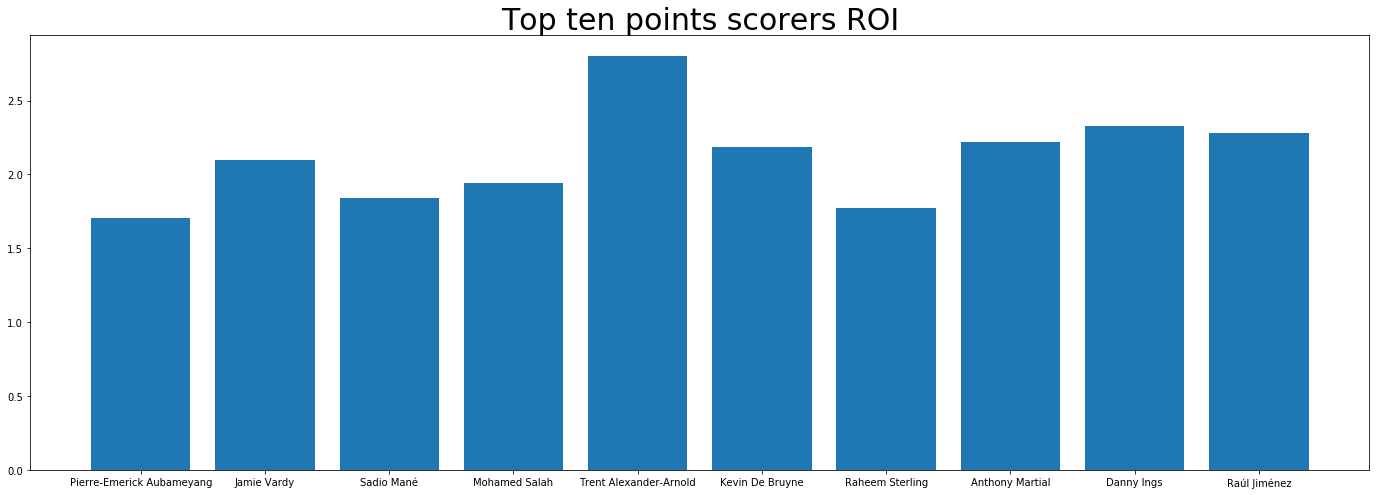

In [1151]:
top_points = list(data.total_points.nlargest(10).index)
top_players = data.index.isin(top_points)
top_players = data[top_players]

fig, ax = plt.subplots(figsize = (24,8))
ax.bar(top_players.full_name, top_players.ROI)
ax.set_title("Top ten points scorers ROI", size = 30)

Text(0.5, 1.0, 'Top ten points scorers total points')

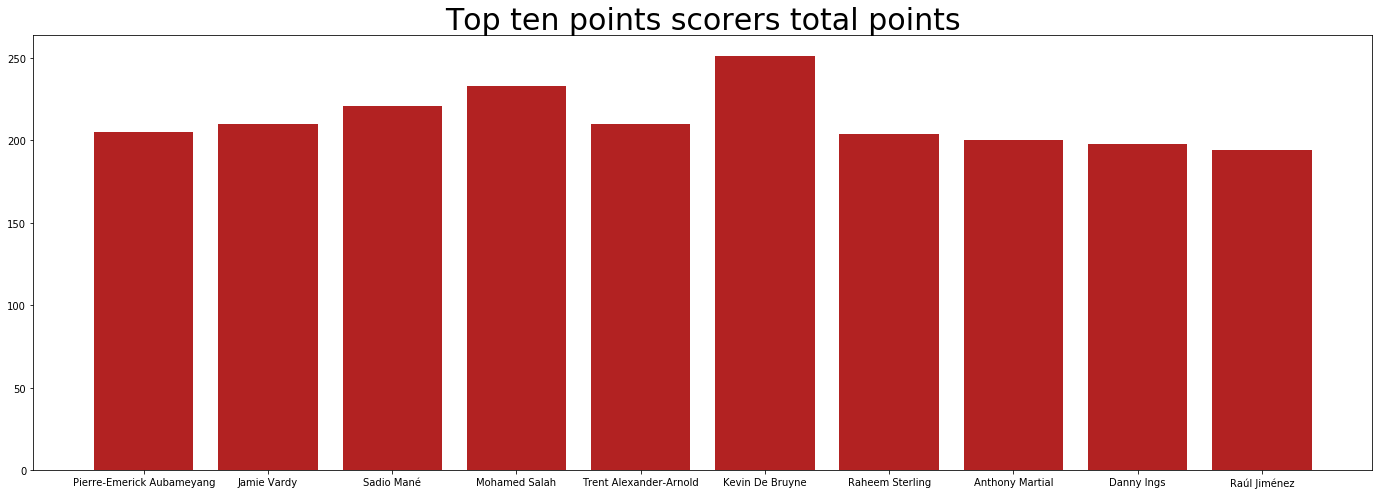

In [1152]:
fig, ax = plt.subplots(figsize = (24,8))
ax.bar(top_players.full_name, top_players.total_points, color = "firebrick")
ax.set_title("Top ten points scorers total points", size = 30)

In [1153]:
MIDFWD = data[data.position.isin([3,4])]
top_roi = list(MIDFWD.ROI.nlargest(10).index)
top_roi = data.index.isin(top_roi)
top_roi = data[top_roi]
top_roi_index = list(top_roi.index)
top_roi_index

top_players_index = list(top_players.index)
top_players_index

high_roi_points = [x for x in top_players_index if x in top_roi_index]
high_roi_points

high_roi_points = data.index.isin(high_roi_points)
data[high_roi_points]

#PLayers who are in both the top 10 for ROI and points scored can be seen below. 

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,...,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,ROI,full_name,id,position
289,Kevin,De Bruyne,13,23,251,2790,22,1990.8,1322.2,1005.0,...,18,0,3,30.0,115,MID,2.182609,Kevin De Bruyne,272,3
320,Anthony,Martial,17,9,200,2625,27,439.3,855.6,1297.0,...,14,0,1,14.8,90,FWD,2.222222,Anthony Martial,303,4
397,Danny,Ings,22,2,198,2800,44,458.3,1010.0,1558.0,...,6,0,3,25.4,85,FWD,2.329412,Danny Ings,366,4
495,Raúl,Jiménez,17,7,194,3241,36,668.2,911.6,1680.0,...,15,0,3,19.1,85,FWD,2.282353,Raúl Jiménez,460,4


As can be seen above, only these four players are in the top 10 for points scored and ROI. The graphs above this 
show the ROI of top points scorers, but only these 4 players are also in the top 10 ROI. Therefore, as can be seen it looks like KDB and Anthony martial are the players to go with. This does not mean that ings and and jiminez are bad choices - they could very likely still make the team. KDB is a dead cert, he is top points scorer and has a really high ROI. Any of these options were viable choices, however, using personal insight I think Martial may have the best season (Man united bias). If he had bruno fernandes behind him the full season his points total would have been much higher. He was also injured for 2 months which would have reduced his output. 

selecting players who are in both of these lists attempts to find the players who are still going to score lots of points but are not overpriced. Players like salah for example score a lot of points but are overpriced. KDB scored more points and even after a price adjustment is less expensive. 

##### Midfeilders

Text(0, 0.5, 'Price(red) and ROI (blue)')

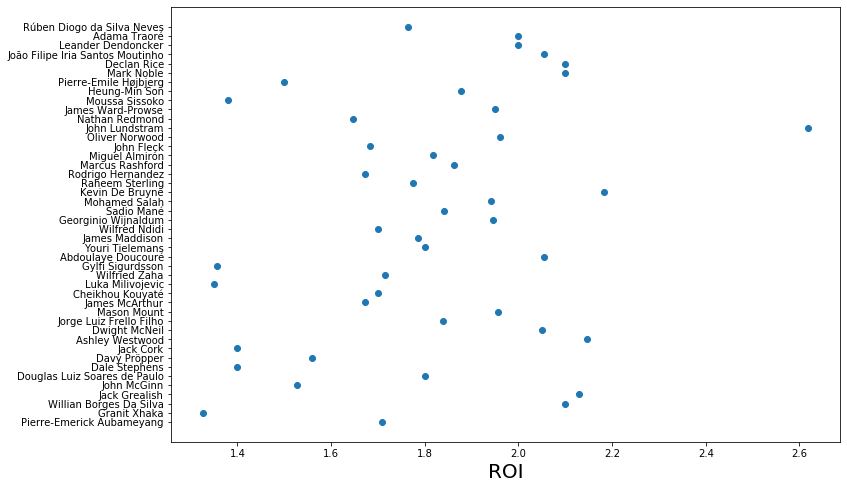

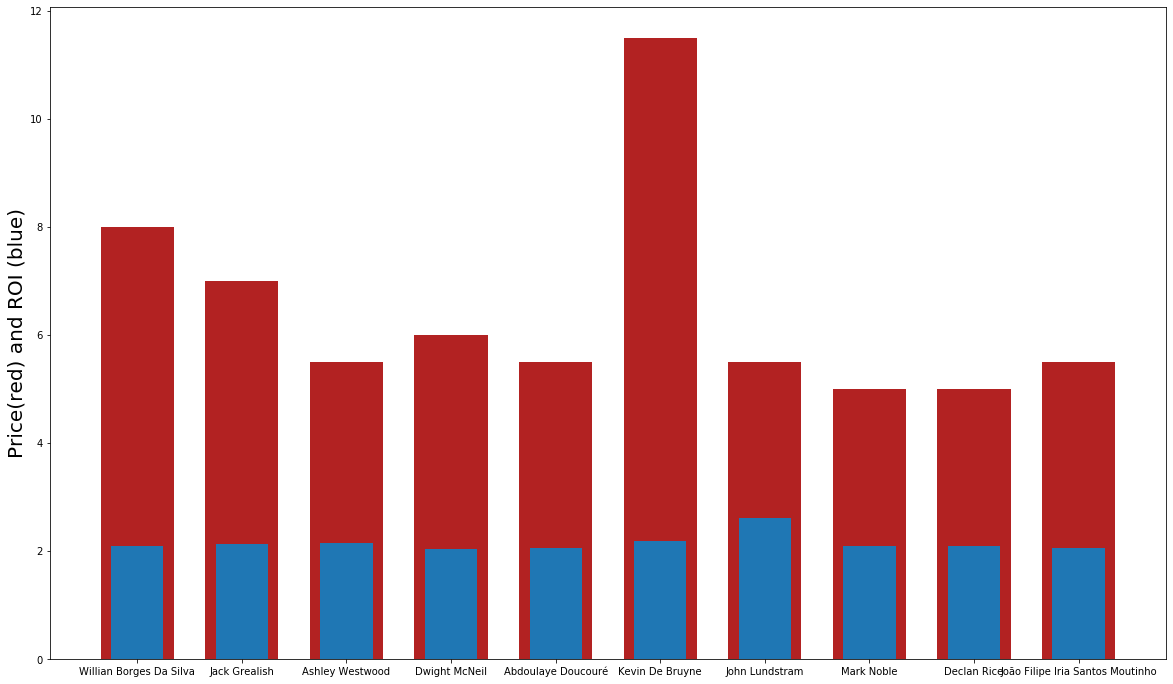

In [1154]:
#We can continue on the same logic, by filtering out players who have less than 2300 minutes I am aware this
#will exlcude certain players that have arrived in Jan or been injured - but will come back to this later)

MID = data[data.position == 3]
MID = MID[MID.minutes >= 2300] # this leaves 45 players, more than enough to chose from. 

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(MID.ROI, MID.full_name)
ax.set_xlabel("ROI", size = 20)

#as can be seen again, a cut off of around 1.9 will leave us plenty of options.

MID = MID[MID.ROI > 2]

fig, ax = plt.subplots(figsize = (20,12))
ax.bar(MID.full_name, MID.now_cost/10, width = 0.7, color = "firebrick")
ax.bar(MID.full_name, MID.ROI, width = 0.5)
ax.set_ylabel("Price(red) and ROI (blue)", size = 20)




The top ten midfileders in terms of ROI can be seen above. Of course KDB is there but there are also some surprising faces. There is also a few we can eliminate however due to change in clubs/positions. Lundtram will lose all defensive points therefore he is not a good choice, and Willians move to Arsenal makes him a less promising choice (as a lot of his points came from penalties at Chelsea and he may not take them at arsenal). 

Grelish, westwood, mcneil are also not availble week 1 so should not be included. Declan rice, Noble and Moutinho are all therefore viable options with high ROI and relatively low prices.

However, these options are also relatively low value. And both the two star players we have included so far will not play first week we should make some adjustments. We can leave KDB out first week and replace him with another star player. Looking back to the list of Star players, Salah is the next highest points scorer and is also playing this week so he is a good choice. He, however, is expensive. If he was to be balanced with the cheaper options mentioned it could work.

##### Forwords

<BarContainer object of 8 artists>

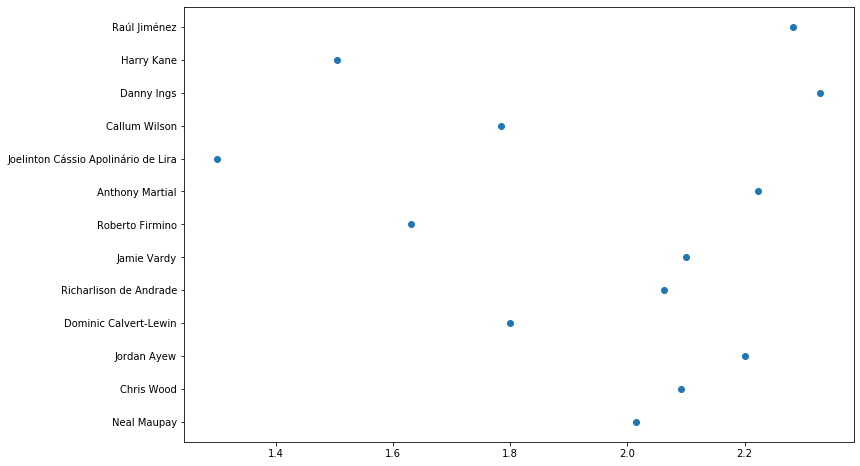

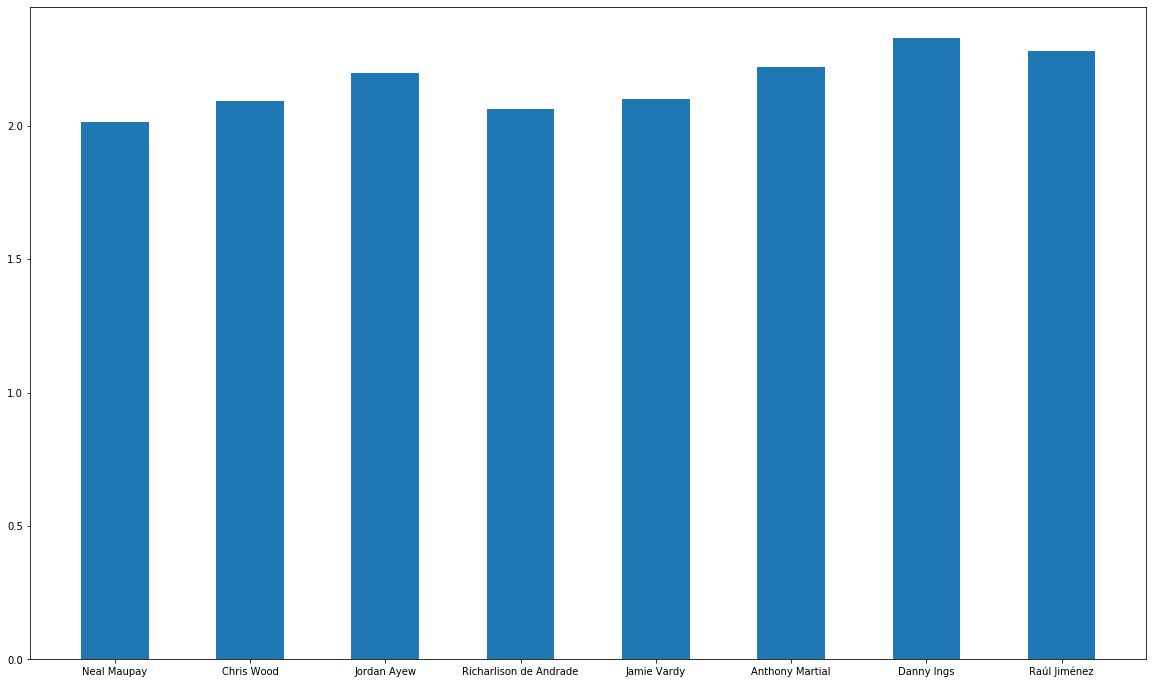

In [1155]:
#A similar methodology can be looked at for forwards:

FWD = data[data.position == 4]
FWD = FWD[FWD.minutes >= 2300] # this leaves 45 players, more than enough to chose from. 

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(FWD.ROI, FWD.full_name)

#as can be seen again, a cut off of around 2 will leave us plenty of options.

FWD = FWD[FWD.ROI > 2]

fig, ax = plt.subplots(figsize = (20,12))
#ax.bar(FWD.full_name, FWD.now_cost/10, width = 0.7, color = "firebrick")
ax.bar(FWD.full_name, FWD.ROI, width = 0.5)


As can be seen above, Danny ings has the highest ROI of any player and is therefore a good choice. This is closely followed by Jiminez. Within the budget contraint I think it is only feasable to have one of these players in. This is followed by Anthony Martial who is already in the team. Ayew is the next highest ROI and also at a significantly lower price and is therefore a solid choice.

### Hidden gems 

The ROI model will occasionally look over players who have not played the full/or close to full season. Therefore, we can also look at ROM (return on minutes) which will show how well a player has done with the minutes they have been given. 

In [1156]:
data["ROM"] = data["total_points"]/data["minutes"]


def graph_rom(data, position, selected, minROM, max_cost):
    data = data[data.selected_by_percent < selected].reset_index(drop = True)
    data = data[data.position == position].reset_index(drop = True)
    data = data[data.ROM > minROM].reset_index(drop = True)
    data = data[data.now_cost <= max_cost].reset_index(drop = True)

    positions = ["inplace", "goalkeeper", "defender", "midfielder", "foreword"]
    player_names = data["full_name"]
    x = data["ROM"]
    y = data["now_cost"]
    fig, ax = plt.subplots(figsize = (24,16))

    for i, txt in enumerate(player_names):
        ax.annotate(txt, (x[i], y[i]), rotation = 30, size = 15)
    
    
    ax.grid(which = "major")
    ax.scatter(data["ROM"], data["now_cost"], s = data["total_points"]*30, alpha = 0.5, 
               color = "mediumseagreen" )
    ax.set_xlabel("$ROM$")
    ax.set_ylabel("$Price$")
    ax.set_title("ROM v Price - {}s".format(positions[position]))
    
    return "the graph below shows the ROM v price of {}s".format(position)

'the graph below shows the ROM v price of 3s'

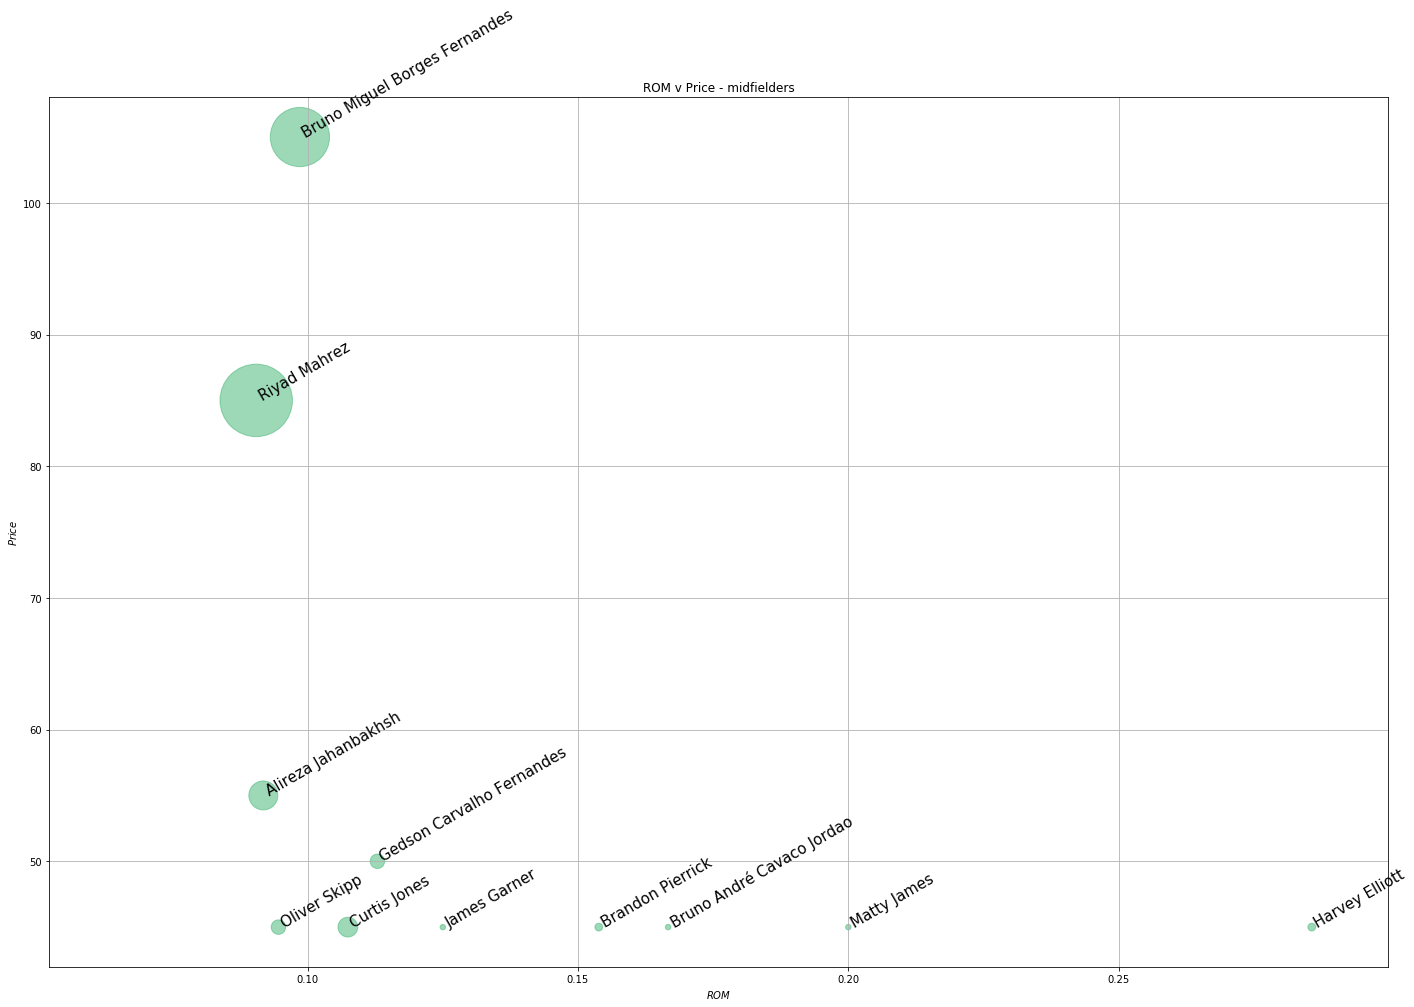

In [1157]:
graph_rom(data, 3, 50, 0.09, 120)

Some of these results must be taken with a punch of salt as they have only played a minute amount of minutes. For exmaple, James garner, harvey elliot etc have all played less than 2 games. Curtis Jones has played 6 games and has a decent return in those games. He is unlikely to start going forward though. The two main outstanding players here are Bruno Fernandes and Mahrez. Both players have high ROM and total points(represented by the size of their circle.)With the departure of Sane and David Silva, Mahrez is likely to get more minutes this season. And Bruno fernandes is likely to start almost every game as he is critical to uniteds team. Therefore, both of these players are good options. 

## Summary

Therefore, considering the above the choices are plentiful. It seems like Pope and Ryan are the best options for Goalkeeper, with Pope starting the majority of the games and bringing Ryan in when Burnleys expected clean sheeets drop too low. 

Defenders, it seems like Trent is a must have and there is a wide variety of supplementary options (Dunk, Tarkowski, VVD, Roberston, Basham, Stevens, Baldock, Egen, Doherty, Coady.

Midfielders, De Bruyne is a clear must have, Bruno Fernandes also looks essential. These can be coupled with some cheaper options to compliment such as Rice, Noble, Moutinho, Graelish, westwood or mcneil. 

And forwards, Martial, Ings and Jiminez are the clear fronrunners. Ayew is also a fantastic option considering his price. His ROI is only less than the three previously mentioned. 


In [1158]:
data.head()

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,...,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,ROI,full_name,id,position,ROM
0,Mesut,Özil,1,3,53,1439,20,582.9,223.6,190.0,...,0,1,1.7,70,MID,0.757143,Mesut Özil,1,3,0.036831
1,Sokratis,Papastathopoulos,2,0,57,1696,25,36.8,436.2,110.0,...,0,6,0.4,50,DEF,1.140000,Sokratis Papastathopoulos,2,2,0.033608
2,David,Luiz Moreira Marinho,2,1,94,2809,42,106.7,701.6,211.0,...,2,5,2.5,55,DEF,1.709091,David Luiz Moreira Marinho,3,2,0.033464
3,Pierre-Emerick,Aubameyang,22,5,205,3136,44,479.6,1006.0,1369.0,...,1,3,45.4,120,MID,1.708333,Pierre-Emerick Aubameyang,4,3,0.065370
4,Cédric,Soares,1,1,61,1553,20,218.9,349.0,118.0,...,0,1,0.6,50,DEF,1.220000,Cédric Soares,5,2,0.039279


### Selection Algoirthm

Step 1 - remove all redundant players. Any player who is directly weaker than another. They are the same price and some position as another player but have less points. 

In [1159]:
trim = data.iloc[:,[-2,-3,-6,4]]
trim.head()
trim = trim.sort_values(by = "id")

In [1160]:
def find_unique(df):
    
    i = 0
    unique = []
    for i in range(len(df.index)):
        player = df.iloc[i,:]
        player_pos = player.position
        player_cost = player.now_cost
        df2 = df[df.position.isin([player_pos])]
        df3 = df2[df2.now_cost.isin([player_cost])]
        player_id_list = list(df3.id)
        
        if len(player_id_list) == 1:
            unique.append(player.id)
        else:
            pass
        
        i += 1
    return unique

unique_players = find_unique(trim)

unique_players

AttributeError: 'Series' object has no attribute 'now_cost'

In [1161]:
def comparison_reduction(trim, unique):
    total_unique = len(trim[trim.position == 1].now_cost.unique()) 
    + len(trim[trim.position == 2].now_cost.unique())
    + len(trim[trim.position == 3].now_cost.unique())
    + len(trim[trim.position == 4].now_cost.unique())
    
    i = 0 
    x = 0
    y = 1
    drop_list = []
    unique_list = unique
    
    player_list = list(trim.id)
    trimmed_id = [x for x in player_list if x not in unique_list]
    minus_unique = [x for x in player_list if x not in unique_players]
    trim = trim[trim.id.isin(minus_unique)]
    trim = trim.sort_values(by = "id")
    
    
    winner_list = []
    
    
    while len(drop_list) < 54:
        
        if x == 400:
            winner_list.append(player_1.id)
            x = 0 
            y=1
            if y < 400:
                winner_list.append(player_2.id)
                x = 0
                y = 1
                
                player_1 = trim.iloc[x,:] 
                player_2 = trim.iloc[y,:]
        

                if not player_1.id in drop_list:
                #has player already been dropped
                    if not player_2.id in drop_list:
                    #has player 2 already been dropped
                        if not player_1.id == player_2.id:
                        #is x = y
                            if player_1.position == player_2.position:
                            #are they the same position
                                if player_1.now_cost == player_2.now_cost:
                                #are they the same price
                                    if player_1.total_points > player_2.total_points:
                                    #who gets dropped
                                        drop_list.append(player_2.id)
                                        x = 0
                                        y = 1
                
                                    else:
                                        drop_list.append(player_1.id)
                                        x = 0
                                        y = 1
                        
                                else:
                                    y += 1
                            else:
                                y += 1
                        else:
                            y+=1
                    else:
                        y += 1
                else:
                    x += 1
            else:
                winner
        
        else:
            
        
          
    return drop_list

#The main error here is that if it does not find a match, it continues to itterate and incremently add 1 to x and y.
#The x and y then exceed the index limit of the slicing method.
#Need to find a place to break and transfer players to a new list

#I have now removed the unique players
#but it still seems to get stuck

#Gets stuck when a player has no opposition - when it finds a winner


IndentationError: expected an indented block (<ipython-input-1161-00ec5dcab0cb>, line 76)

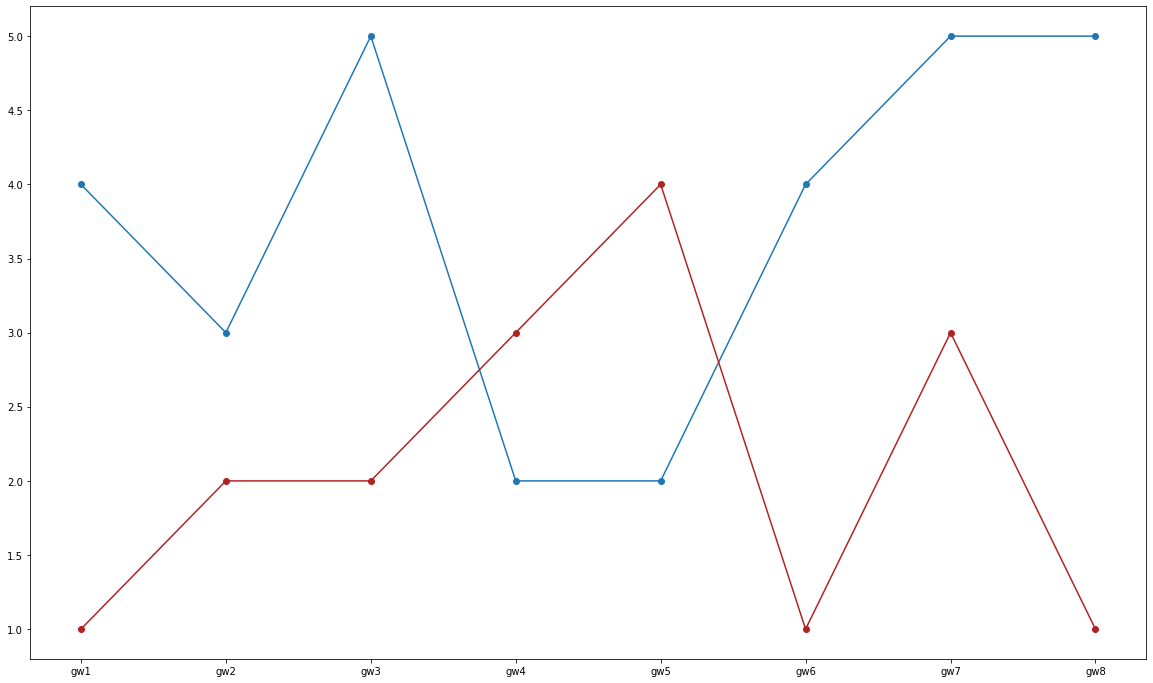

In [1162]:
x = ["gw1", "gw2", "gw3", "gw4", "gw5", "gw6", "gw7", "gw8"]
y = np.array([4,3,5,2,2,4,5,5])
z = np.array([1,2,2,3,4,1,3,1])

fig,ax = plt.subplots(figsize =(20,12))
ax.plot(x,y, linestyle = "-", marker = "o")
ax.plot(x,z, linestyle = "-", marker = "o", color = "firebrick")


In [1163]:
DEF = data[data.position == 2]
MID = data[data.position == 3]
FWD = data[data.position == 4]

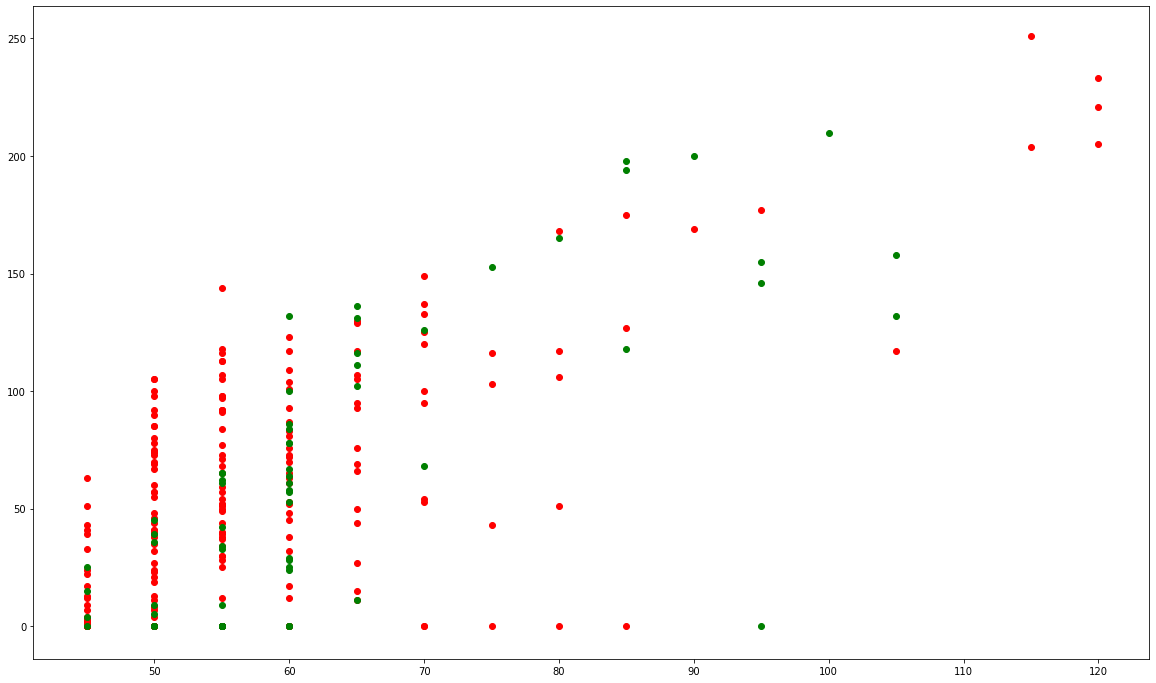

In [1164]:
fig, ax = plt.subplots(figsize = (20,12))
#ax.scatter(DEF.now_cost,DEF.total_points)
ax.scatter(MID.now_cost,MID.total_points, color = "red")
ax.scatter(FWD.now_cost,FWD.total_points, color = "green")

In [1165]:
def printknapSack(W, wt, val, n): 
    K = [[0 for w in range(W + 1)] 
            for i in range(n + 1)] 
              
    # Build table K[][] in bottom 
    # up manner 
    for i in range(n + 1): 
        for w in range(W + 1): 
            if i == 0 or w == 0: 
                K[i][w] = 0
            elif wt[i - 1] <= w: 
                K[i][w] = max(val[i - 1]  
                  + K[i - 1][w - wt[i - 1]], 
                               K[i - 1][w]) 
            else: 
                K[i][w] = K[i - 1][w] 
  
    # stores the result of Knapsack 
    res = K[n][W] 
    print(res) 
      
    w = W 
    for i in range(n, 0, -1): 
        if res <= 0: 
            break
        # either the result comes from the 
        # top (K[i-1][w]) or from (val[i-1] 
        # + K[i-1] [w-wt[i-1]]) as in Knapsack 
        # table. If it comes from the latter 
        # one/ it means the item is included. 
        if res == K[i - 1][w]: 
            continue
        else: 
  
            # This item is included. 
            print(wt[i - 1]) 
              
            # Since this weight is included 
            # its value is deducted 
            res = res - val[i - 1] 
            w = w - wt[i - 1] 
  
# Driver code 
val = [ 60, 100, 120 ] 
wt = [ 10, 20, 30 ] 
W = 50
n = len(val) 
      
printknapSack(W, wt, val, n) 

220
30
20


### Marginal cost at prices

In [1166]:
def find_average_at_price(data):
    prices = data.now_cost.unique()
    returns = []
    
    for i in prices:
        at_price = data[data.now_cost == i]
        average = at_price.total_points.sum()/len(at_price)
    
        
        returns.append(average)
    
    return prices, returns
    

2.590260895109899


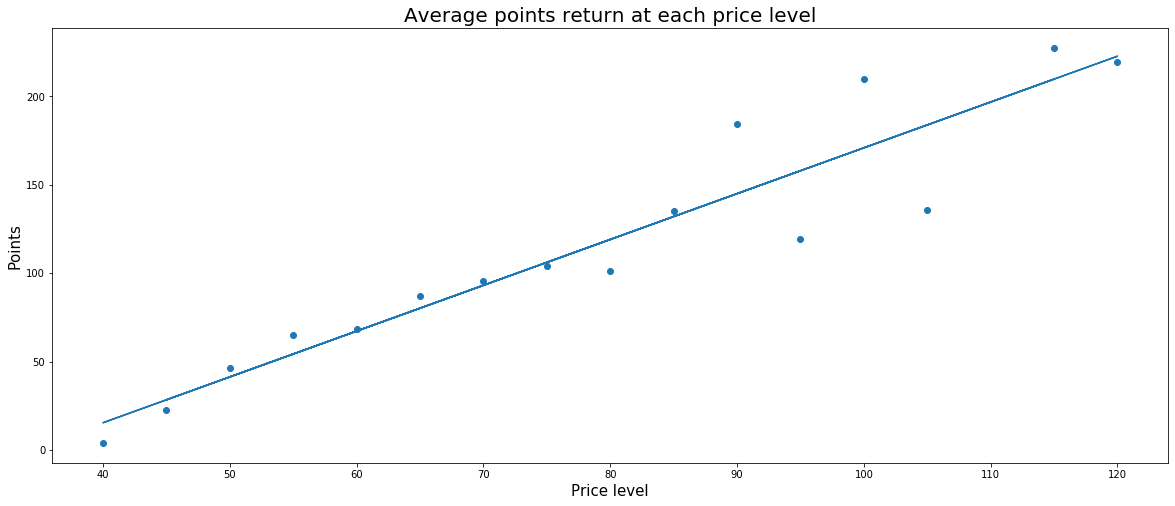

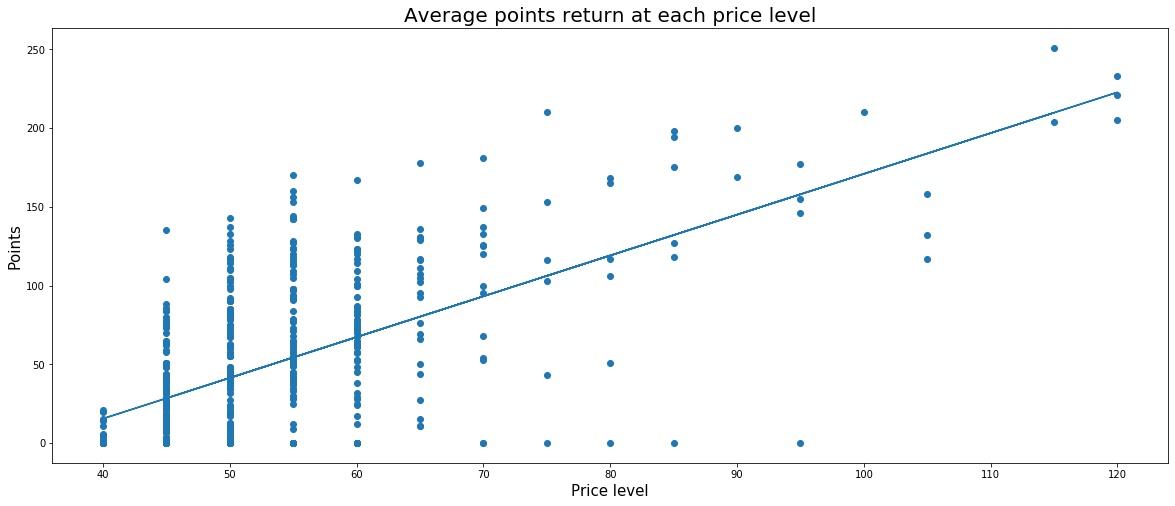

In [1167]:
x,y = find_average_at_price(data)

fig, ax = plt.subplots(figsize = (20,8))
m, b = np.polyfit(x,y,1)
ax.scatter(x,y)
plt.plot(x, m*x + b)
ax.set_xlabel("Price level", size = 15)
ax.set_ylabel("Points", size = 15)
ax.set_title("Average points return at each price level", size = 20)

fig, ax = plt.subplots(figsize = (20,8))
ax.scatter(data.now_cost,data.total_points)
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

ax.set_xlabel("Price level", size = 15)
ax.set_ylabel("Points", size = 15)
ax.set_title("Average points return at each price level", size = 20)


print(m)